<h2> <b> Working With Textual Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.shape

(50000, 2)

In [4]:
print(df['review'][0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

### <b> 0. Data Gathering
### <b> 1. 🧼 **Data Cleaning**  
- Lower‑casing,  
- Removing Leading & Trailing Spaces,
- stripping HTML/URLs,
- expanding contractions,
- Removing whitespaces
- removing punctuation
- spelling correction
- special chars.

### <b> 2. PreProcess
- Tokenization
- Stopword removal

### <b> 3. EDA
###  <b> 4. Make more features (featuring engineering)  
### <B> 5. Vectorization

- Bag of Word
- TF-IDF
- Wordvec

### <b> 6. Modelling
### <b> 7. Evalution
### <b> 8. Deploy
### <b> 9. Monitorring

### Additionals  
- PCA
- POS tagging
- Stemming => this is optional as this don't always help in model performance

#### **Today, we are gonna do 1 to 5 steps on the IMBD dataset**

In [5]:
# Basically we are gonna do the job of data analytics role 1 to 5

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
df.duplicated().sum()

418

### **🚮 Dropping Duplicated data**

In [8]:
df = df.drop_duplicates()

### Here, we are gonna take 10,000 data for learning purpose

In [9]:
df = df.iloc[:10000]

df.shape

(10000, 2)

### 🧼Cleaning

#### **1. Lowercasing the Reviews**

In [10]:
df['review'] = df['review'].str.lower()

#### **2. Removing Leading & Trailing Spaces**

In [11]:
df['review'] = df['review'].str.strip()

#### **3. Removing HTML Tags**

##### **i) Using Regex**

In [12]:
import re # importing regex

def remove_html(data):

    '''
    Removes all HTML tags from the data.
    '''

    data = re.sub(r'<.*?>', '', data)
    return data

In [13]:
remove_html("<h3>My name is<b> Zain</b>")

'My name is Zain'

In [14]:
df['review'].apply(remove_html)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. the filming tec...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing. w...
10016    a really very bad movie, with a very few good ...
Name: review, Length: 10000, dtype: object

##### **ii) Using replace method**

In [15]:
df['review'] = df['review'].str.replace(r'<.*?>', '', regex = True).str.strip()

In [16]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


#### **4. Removing URLs**

In [17]:
def remove_url(data):

    '''
    Removes all the URL from the data.
    '''

    data = re.sub(r"https?://\S+|www\.\S+", '', data)
    return data

In [18]:
# testing the function
remove_url('Open google using the url: http://www.google.com')

'Open google using the url: '

<h5> How to see those reviews which contains URLs.

In [19]:
df[df['review'].str.contains(r"https?://\S+|www\.\S+", '', regex=True)]

,review,sentiment
742,mario lewis of the competitive enterprise inst...,negative
907,following directly from where the story left o...,positive
1088,this quasi j-horror film followed a young woma...,negative
1137,i really think i should make my case and have ...,positive
1141,this show has to be my favorite out of all the...,positive
1972,the basic plot of 'marigold' boasts of a roman...,negative
2132,"i, too, found ""oppenheimer"" to be a brilliant ...",positive
3020,"the angry red planet (quickie review) like ""th...",negative
3038,"i really love this movie , i saw it for the fi...",positive
3200,i think that mario van peebles movie posse is ...,positive


In [20]:
df[df['review'].str.contains(r"https?://\S+|www\.\S+", '', regex=True)].iloc[0].values

array(['mario lewis of the competitive enterprise institute has written a definitive 120-page point-by-point, line-by-line refutation of this mendacious film, which should be titled a convenient lie. the website address where his debunking report, which is titled "a skeptic\'s guide to an inconvenient truth" can be found at is :www.cei.org. a shorter 10-page version can be found at: www.cei.org/pdf/5539.pdf once you read those demolitions, you\'ll realize that alleged "global warming" is no more real or dangerous than the y2k scare of 1999, which gore also endorsed, as he did the pseudo-scientific film the day after tomorrow, which was based on a book written by alleged ufo abductee whitley strieber. as james "the amazing" randi does to psychics, and philip klass does to ufos, and gerald posner does to jfk conspir-idiocy theories, so does mario lewis does to al gore\'s movie and the whole "global warming" scam.',
       'negative'], dtype=object)

In [21]:
# Code to remove the url's
df['review'] = df['review'].str.replace(r"https?://\S+|www\.\S+", '', regex=True)

<h4> <b>5.Remove extra whitespaces inside text

In [22]:
df["review"] = df["review"].str.replace(r"\s+", " ", regex=True)

#### **6. Expanding Abbreviations**

<hr><hr>
Good topic! Expanding abbreviations (and contractions) *can* help your NLP model — depending on what you’re doing — so let’s go deep on this: **when** it's worth doing, **how** to do it in pandas / Python, plus gotchas. By the end, you’ll know everything you need.

---

## 🤔 Is It Worth Expanding Abbreviations?

First: what do we mean by “abbreviations”? Two kinds:

1. **Contractions**: short forms like `"don't"` → `"do not"`, `"I'm"` → `"I am"`.
2. **Abbreviations / Acronyms / Slang**: `"btw"` → `"by the way"`, `"FYI"` → `"for your information"`, `"lol"`, etc.

### Pros of expanding:

* **Consistency / normalization**: Different people write differently. Expanding helps bring variation down. E.g. “don’t”, “dont” vs “do not”.
* **Better feature overlap**: For simpler models (bag-of-words, TF-IDF), expansions make features less sparse. If some reviews say “don’t” and some say “do not”, they’d map to different tokens unless normalized.
* **Interpretability**: Your model’s vocabulary / features are easier to inspect if text is more “standard”.

### Cons / when maybe don’t bother:

* If your model uses **subword tokenization** (like BERT, RoBERTa) that handles “don’t” and “do”+“n’t” pretty well, expansion may produce marginal gains or even slightly hurt (because it changes tokenization and context).
* Expanding slang or internet abbreviations may be tricky: they could be ambiguous or domain‐specific.
* Over-expansion or wrong expansions (if your mapping is imperfect) might introduce noise.

### Verdict:

Yes — generally worth doing in “classic NLP pipelines” (TF-IDF, count vectors, maybe even when you build embeddings from scratch). Less essential when you use end-to-end transformer models, but still helpful for cleaning and interpretability.

---

## 🛠 How to Expand Abbreviations / Contractions in Python + Pandas

Here are methods & examples so you can implement cleanly.

---

### 1. Expanding Contractions (“don’t”, “I’m”, etc.)

You can use existing libraries:

* **`contractions`** library (from PyPI): simple and reliable.
* **`pycontractions`**: uses word embeddings to guess expansions sometimes.

#### Example using `contractions`:

```python
import pandas as pd
import contractions

df = pd.read_csv("IMDB Dataset.csv")

def expand_contraction(text):
    return contractions.fix(text)

df['review_expanded'] = df['review'].apply(expand_contraction)
```

---

### 2. Expanding Abbreviations / Slang / Acronyms

For this you usually need:

* A **mapping dictionary**: e.g. `{"btw": "by the way", "fyi": "for your information", "lol": "laughing out loud", ...}`
* Possibly tools / packages that offer these mappings or help detect them.

#### Simple mapping + apply:

```python
abbr_dict = {
    "btw": "by the way",
    "fyi": "for your information",
    "imo": "in my opinion",
    # ... you add what’s relevant
}

import re

def expand_abbreviations(text, mapping):
    # make word boundaries to avoid partial replacements
    pattern = re.compile(r'\b(' + '|'.join(mapping.keys()) + r')\b', flags=re.IGNORECASE)
    return pattern.sub(lambda x: mapping[x.group().lower()], text)

df['review_expanded2'] = df['review_expanded'].apply(lambda x: expand_abbreviations(x, abbr_dict))
```

---

### 3. Combined Pipeline

Clean text might look like this:

1. Remove HTML tags
2. Expand contractions
3. Expand abbreviations/slang
4. Normalize whitespace
5. Lowercase, punctuation removal, etc.

Example:

```python
import pandas as pd
import contractions
from bs4 import BeautifulSoup
import re

abbr_dict = {
    "btw": "by the way",
    "fyi": "for your information",
    "imo": "in my opinion",
    # etc
}

def clean_text(text):
    # remove html
    text = BeautifulSoup(text, "html.parser").get_text()
    # expand contractions
    text = contractions.fix(text)
    # expand abbreviations/slang
    pattern = re.compile(r'\b(' + '|'.join(abbr_dict.keys()) + r')\b', flags=re.IGNORECASE)
    text = pattern.sub(lambda x: abbr_dict[x.group().lower()], text)
    # remove extra whitespace
    text = re.sub(r'\s+', " ", text).strip()
    # lowercase
    text = text.lower()
    return text

df['review_clean'] = df['review'].apply(clean_text)
```

---

## 📚 Tools / Packages

* **`contractions`**: for English contraction expansion.
* **`abbreviations-py`**: there is a package mentioned in articles that helps expand abbreviations/slang. ([Medium][1])
* **Custom mapping**: you build your own dictionary of abbreviations common in your data.

---

## ⚠️ Gotchas & Edge Cases

* **Ambiguous abbreviations**: “US” could be “United States” or “us” (pronoun) — context matters.
* **Case-sensitivity**: abbreviations in different cases (“FYI”, “fyi”) → handle case properly.
* **False expansions**: “Dr.” → “Doctor” is okay; but “dr” sometimes is “drive”.
* **Slang evolving / domain specific**: mapping may need updates.
* **Tokenization interplay**: after expansion, tokenization count changes, lengths change, might affect padding/truncation if using neural networks.

---

## ✅ Implementation Example in Pandas (Full)

Here’s a full example you can plug into your IMDB reviews dataset:

```python
import pandas as pd
import contractions
from bs4 import BeautifulSoup
import re

# Load
df = pd.read_csv("IMDB Dataset.csv")

# Abbreviation/slang mapping (you can expand this list)
abbr_dict = {
    "btw": "by the way",
    "fyi": "for your information",
    "imo": "in my opinion",
    "idk": "i do not know",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "u": "you",
    "ur": "your",
    "dont": "do not",
    "cant": "can not",
    "won't": "will not",
    # add more as you see in reviews
}

def expand_text_pipeline(text):
    # 1. remove html
    text = BeautifulSoup(text, "html.parser").get_text()
    # 2. expand contractions
    text = contractions.fix(text)
    # 3. expand abbreviations/slang
    pattern = re.compile(r'\b(' + '|'.join(map(re.escape, abbr_dict.keys())) + r')\b', flags=re.IGNORECASE)
    text = pattern.sub(lambda x: abbr_dict[x.group().lower()], text)
    # 4. collapse whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # 5. lowercase
    text = text.lower()
    return text

df['review_processed'] = df['review'].apply(expand_text_pipeline)
```

---

## 🔍 When to Skip or Modify

* If you're using **pretrained transformers** that already have normalization for common contractions/slang, the benefit may be small.
* If mapping is too generic, might over-expanding and losing style cues.
* If abbreviations are rare in your text, cost vs gain might be minimal.

---


Excellent question 👍 — yes, there *are* more advanced ways than just writing a manual mapping dictionary for expanding abbreviations and slang. Let me break it down for you:

---

# 🔄 Alternatives to Manual Mapping

## 1. **Pre-trained NLP Models for Slang / Abbreviation Expansion**

* Some research models are trained specifically for *text normalization* (like SMS, Twitter, Reddit text).
* These models can take slang/abbreviations and output normalized English.
* Example: `"idk why u did that"` → `"I don't know why you did that"`.
* Tools:

  * **NLTK TweetTokenizer + custom models**
  * **Hugging Face models** tagged as “text normalization” or “lexical normalization”.
    (E.g., BERT variants fine-tuned for normalization tasks.)

---

## 2. **Using Word Embeddings (Context-Based Expansion)**

* Idea: Learn semantic similarity using **word2vec / fastText / GloVe**.
* Example:

  * You see `"imo"` → embeddings show it's close to `"personally"`, `"opinion"`, `"think"`.
  * That helps you auto-map `"imo"` → `"in my opinion"`.
* You can:

  1. Train embeddings on your dataset (IMDB reviews).
  2. Look at nearest neighbors for unknown/slang words.
  3. Build semi-automated mappings.

---

## 3. **Regular Expression + Pattern Libraries**

* Sometimes slang follows patterns:

  * `"u"` → `"you"`, `"r"` → `"are"`, `"ur"` → `"your"`.
  * Words with repeated letters `"soooo"` → `"so"`.
* Regex rules can capture a large set of “internet spelling” issues automatically.

```python
import re
def normalize_internet_slang(text):
    text = re.sub(r'\b(u)\b', "you", text)
    text = re.sub(r'\bur\b', "your", text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # reduce loooove → love
    return text
```

---

## 4. **External Lexicon Resources**

Instead of writing mappings yourself, you can pull from **ready-made slang dictionaries**:

* **`noslang.com` API** → has thousands of English slang/abbreviations.
* **`slangdict` GitHub repos** with JSON slang expansions.
* **Urban Dictionary APIs** (careful: noisy, but huge coverage).
* Some academic projects provide **SMS/Chat Slang corpora**.

You can load these JSON/CSV dictionaries and apply them just like your manual mapping, but with far larger coverage.

---

## 5. **LLMs as On-the-Fly Normalizers**

* Since you’re already studying Generative AI ⚡:
  You can use GPT-like models as *normalizers* by prompting them:

  * Input: `"idk why u r mad lol"`
  * Output: `"I don't know why you are mad, laughing out loud."`
* For larger datasets, this is expensive, but for small corpora or building a **training lexicon**, it works very well.

---

## 6. **Hybrid Approach (Best in Practice)**

Most real projects do this:

1. **Use contractions library** → handle formal contractions.
2. **Regex cleaning** → handle patterns (extra letters, shortcuts).
3. **Load slang dictionary** → cover 80% of common abbreviations.
4. **Fallback to embeddings / LLM** → handle rare/unseen cases.

---

# ⚖️ Which Approach Should You Use?

* **Learning stage (your case)** → Start with **dictionary + regex**, because it’s transparent and you’ll *understand exactly* how text transforms.
* **Production system / research** → Consider hybrid + embeddings or pretrained normalizers.
* **Large scale, messy social data** (Twitter/Reddit) → go for pretrained or LLM-based normalizers.

---

✅ So yes — **you don’t have to rely only on manual mappings**. You can leverage external slang lexicons, regex rules, embeddings, or even LLMs.

---


<h5> 1️⃣ Method

In [ ]:
import contractions

def expand_contraction(text):
    return contractions.fix(text)

df['review'] = df['review'].apply(expand_contraction)


In [25]:
contractions.fix("My name is Zain, i don't speak English and i hate u")

'My name is Zain, i do not speak English and i hate you'

<h5> 2️⃣ Method

In [26]:
# this code is provided for Nitish sir for expanding abbreviation nothing fancy is in this code, so don't fear future Zain
def remove_abb(data):

    '''
    Replaces all the abbreviations with their expanded form.
    '''

    data = re.sub(r"he's", "he is", data)
    data = re.sub(r"there's", "there is", data)
    data = re.sub(r"We're", "We are", data)
    data = re.sub(r"That's", "That is", data)
    data = re.sub(r"won't", "will not", data)
    data = re.sub(r"they're", "they are", data)
    data = re.sub(r"Can't", "Cannot", data)
    data = re.sub(r"wasn't", "was not", data)
    data = re.sub(r"don\x89Ûªt", "do not", data)
    data = re.sub(r"aren't", "are not", data)
    data = re.sub(r"isn't", "is not", data)
    data = re.sub(r"What's", "What is", data)
    data = re.sub(r"haven't", "have not", data)
    data = re.sub(r"hasn't", "has not", data)
    data = re.sub(r"There's", "There is", data)
    data = re.sub(r"He's", "He is", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"You're", "You are", data)
    data = re.sub(r"I'M", "I am", data)
    data = re.sub(r"shouldn't", "should not", data)
    data = re.sub(r"wouldn't", "would not", data)
    data = re.sub(r"i'm", "I am", data)
    data = re.sub(r"I\x89Ûªm", "I am", data)
    data = re.sub(r"I'm", "I am", data)
    data = re.sub(r"Isn't", "is not", data)
    data = re.sub(r"Here's", "Here is", data)
    data = re.sub(r"you've", "you have", data)
    data = re.sub(r"you\x89Ûªve", "you have", data)
    data = re.sub(r"we're", "we are", data)
    data = re.sub(r"what's", "what is", data)
    data = re.sub(r"couldn't", "could not", data)
    data = re.sub(r"we've", "we have", data)
    data = re.sub(r"it\x89Ûªs", "it is", data)
    data = re.sub(r"doesn\x89Ûªt", "does not", data)
    data = re.sub(r"It\x89Ûªs", "It is", data)
    data = re.sub(r"Here\x89Ûªs", "Here is", data)
    data = re.sub(r"who's", "who is", data)
    data = re.sub(r"I\x89Ûªve", "I have", data)
    data = re.sub(r"y'all", "you all", data)
    data = re.sub(r"can\x89Ûªt", "cannot", data)
    data = re.sub(r"would've", "would have", data)
    data = re.sub(r"it'll", "it will", data)
    data = re.sub(r"we'll", "we will", data)
    data = re.sub(r"wouldn\x89Ûªt", "would not", data)
    data = re.sub(r"We've", "We have", data)
    data = re.sub(r"he'll", "he will", data)
    data = re.sub(r"Y'all", "You all", data)
    data = re.sub(r"Weren't", "Were not", data)
    data = re.sub(r"Didn't", "Did not", data)
    data = re.sub(r"they'll", "they will", data)
    data = re.sub(r"they'd", "they would", data)
    data = re.sub(r"DON'T", "DO NOT", data)
    data = re.sub(r"That\x89Ûªs", "That is", data)
    data = re.sub(r"they've", "they have", data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"should've", "should have", data)
    data = re.sub(r"You\x89Ûªre", "You are", data)
    data = re.sub(r"where's", "where is", data)
    data = re.sub(r"Don\x89Ûªt", "Do not", data)
    data = re.sub(r"we'd", "we would", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"weren't", "were not", data)
    data = re.sub(r"They're", "They are", data)
    data = re.sub(r"Can\x89Ûªt", "Cannot", data)
    data = re.sub(r"you\x89Ûªll", "you will", data)
    data = re.sub(r"I\x89Ûªd", "I would", data)
    data = re.sub(r"let's", "let us", data)
    data = re.sub(r"it's", "it is", data)
    data = re.sub(r"can't", "cannot", data)
    data = re.sub(r"don't", "do not", data)
    data = re.sub(r"you're", "you are", data)
    data = re.sub(r"i've", "I have", data)
    data = re.sub(r"that's", "that is", data)
    data = re.sub(r"i'll", "I will", data)
    data = re.sub(r"doesn't", "does not",data)
    data = re.sub(r"i'd", "I would", data)
    data = re.sub(r"didn't", "did not", data)
    data = re.sub(r"ain't", "am not", data)
    data = re.sub(r"you'll", "you will", data)
    data = re.sub(r"I've", "I have", data)
    data = re.sub(r"Don't", "do not", data)
    data = re.sub(r"I'll", "I will", data)
    data = re.sub(r"I'd", "I would", data)
    data = re.sub(r"Let's", "Let us", data)
    data = re.sub(r"you'd", "You would", data)
    data = re.sub(r"It's", "It is", data)
    data = re.sub(r"Ain't", "am not", data)
    data = re.sub(r"Haven't", "Have not", data)
    data = re.sub(r"Could've", "Could have", data)
    data = re.sub(r"youve", "you have", data)
    data = re.sub(r"donå«t", "do not", data)

    return data

In [27]:
remove_abb("My name is Zain, i don't speak English and i hate u")

'My name is Zain, i do not speak English and i hate u'

In [28]:
df['review'] = df['review'].apply(remove_abb)

<h4><b>7. Spelling Correction

> Spelling Correction is very difficult task, so we cannot do this all by ourself that why we are gonna use a library called **textblob**

Great thought 👍 — you’re diving into a **core text normalization step**: spelling correction. Let’s unpack both **whether it’s worth doing** and **how to actually do it**.

---

# 🔹 1. Is Spelling Correction Worth It?

It depends on your **downstream task** and **data type**:

✅ **Worth doing if:**

* Your dataset has **lots of typos** (IMDB reviews are user-generated → yes, many typos).
* You are using **traditional NLP models** (Bag-of-Words, TF-IDF, Logistic Regression, Naive Bayes).
  → “gret” and “great” will be treated as different words, which hurts performance.
* You want a **cleaner, smaller vocabulary**.

🤷 **Less important if:**

* You’re using **subword tokenizers** (BERT, GPT, etc.).
  → They break unknown words into smaller units (e.g., “gret” → `gr` + `##et`), so the impact is smaller.
* The dataset is already clean enough.

⚠️ **But**: correcting spelling can sometimes **introduce errors** (e.g., “heros” → “herbs”). So always check accuracy.

👉 For IMDB (lots of casual writing, misspellings) — **yes, spelling correction is useful if you’re doing classical NLP.**

---

# 🔹 2. How to Do Spelling Correction in Python

## ✅ Method 1: `textblob`

Super simple, but slow for big datasets.

```python
from textblob import TextBlob

def correct_spelling(text):
    return str(TextBlob(text).correct())

df["clean_review"] = df["review"].apply(correct_spelling)
```

* `"I loev this moovie"` → `"I love this movie"`
* Works word by word with context (but can be slow on 50k reviews).

---

## ✅ Method 2: `autocorrect` (faster)

```python
from autocorrect import Speller

spell = Speller(lang='en')

df["clean_review"] = df["review"].apply(lambda x: spell(x))
```

* `"Ths moive ws amazng"` → `"The movie was amazing"`
* Faster than TextBlob, but not always as context-aware.

---

## ✅ Method 3: `SymSpell` (best for speed + accuracy)

* Uses a prebuilt frequency dictionary.
* Extremely fast (used in production).
* Can handle **millions of words in milliseconds**.

```python
from symspellpy.symspellpy import SymSpell, Verbosity

# Initialize
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
sym_spell.load_dictionary("frequency_dictionary_en_82_765.txt", 0, 1)

def symspell_correct(text):
    corrected_words = []
    for word in text.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        corrected_words.append(suggestions[0].term if suggestions else word)
    return " ".join(corrected_words)

df["clean_review"] = df["review"].apply(symspell_correct)
```

* Much faster and more robust for large datasets.

---

## ✅ Method 4: Use LLMs for context-aware correction

* You can pass a sentence to a model like GPT or T5 and ask it to **spell-correct with context**.
* `"I loev this moovie"` → `"I love this movie"`,
  `"The revoew was grt"` → `"The review was great"`.

This works best but is computationally expensive.

---

# 🔹 3. Practical Recommendation for You

Since you’re learning **pandas + NLP preprocessing** on IMDB:

1. Start with **`autocorrect`** (easy + fast).
2. If performance is too slow → switch to **SymSpell**.
3. For final ML models:

   * If **TF-IDF / classical ML** → definitely correct spelling.
   * If **BERT or Transformer-based** → optional.

---

⚡ **New insight for you**: Instead of correcting *everything*, you can do **frequency-based filtering**:

* Correct words that occur **very rarely** (likely typos).
* Keep common slang/intentional misspellings (e.g., “loooove”) since they carry sentiment.

---


Great question 👌 — this is exactly the kind of thing that separates **academic preprocessing** from **real industry pipelines**. Let’s go step by step.

---

# 🔹 What’s Mainly Used in Industry for Spelling Correction?

## 1. **Do they even correct spelling?**

* In **many real NLP pipelines**, spelling correction is **not always done**.
* Why?

  * Modern models (BERT, GPT, etc.) handle misspellings well with **subword tokenizers** (`"moovie"` → `moo` + `##vie`).
  * Correcting spelling risks **changing intended meaning** (“loool” → “lool” → “look”).
  * It **adds latency** (slows down pipelines).
    👉 So in production, **spelling correction is often skipped unless data is very noisy** (e.g., customer support chats, OCR data).

---

## 2. **When spelling correction *is* used, industry prefers:**

### ✅ **SymSpell / Hunspell**

* **SymSpell**: very fast, dictionary + frequency based.

  * Handles millions of words in milliseconds.
  * Popular in **search engines, e-commerce (typo-tolerant search)**.
  * Example: User types `"iphon 15"` → system suggests `"iPhone 15"`.

* **Hunspell**: Used in browsers (Chrome, Firefox, LibreOffice).

  * Rule-based + dictionary.
  * Good for general spelling correction, widely adopted.

---

### ✅ **Context-Aware Models (Neural)**

* In **text-heavy apps (chatbots, NLP assistants)**, companies may use:

  * **seq2seq models** (trained on noisy → clean pairs).
  * **T5, BART, GPT fine-tuned** for spelling/grammar correction.
* Example: Grammarly, Google Docs spell checker, Microsoft Word.
* They don’t just fix spelling but also **grammar + style**.

---

### ✅ **Search Industry (Elasticsearch / Solr)**

* Instead of “correcting” text, they build **typo-tolerant search indexes**.

  * Uses **edit distance algorithms** (Levenshtein distance).
  * So `"iphon"` can still match `"iPhone"`.
* This avoids modifying user input, but still retrieves correct results.

---

### ✅ **Hybrid Approach**

Many production systems combine:

1. **Dictionary-based correction** (SymSpell/Hunspell).
2. **Contextual filtering** (does this correction make sense in this sentence?).
3. **ML models for rare/complex cases**.

Example:

* Input: `"I loev this moovie"`
* Dictionary sees `"loev"` → `"love"`.
* Context model checks `"this love movie"` vs `"this movie"`.
* Final correction: `"I love this movie"`.

---

# 🔹 Industry Choices by Use-Case

* **Search engines / e-commerce (Amazon, Flipkart, Google Search):**
  → SymSpell + edit distance + typo-tolerant search.

* **Office apps (Grammarly, MS Word, Google Docs):**
  → Neural grammar/spelling correction models (T5, BART, GPT).

* **Customer support bots:**
  → Often skip correction; rely on context-aware embeddings.

* **Social media NLP (sentiment, toxicity):**
  → Usually skip correction to preserve meaning of slang/creative spelling.

---

# 🔹 TL;DR

👉 **Most common in industry:**

* **SymSpell / Hunspell / edit distance** (search, real-time apps).
* **Neural models (T5/BART)** for high-quality correction (Grammarly, docs).
* **Skip correction** entirely in deep learning NLP pipelines unless the data is *very noisy*.

---

⚡ **New learning angle for you**:
Instead of thinking “should I always fix spelling?”, industry asks:

* Does my **tokenizer/model** already handle this?
* Is **user intent** better preserved without correction?
* Do I need **speed** (SymSpell) or **quality** (neural models)?

---


In [29]:
from textblob import TextBlob

text = "My name is Zain, i am vry fat peson."

TextBlob(text).correct().string

'By name is Pain, i am very fat person.'

In [30]:
### Gonna take a lot of time, so that why using different method to correct the spelling.

# def correct_spelling(text):
#     return str(TextBlob(text).correct())

# df["clean_review"] = df["review"].apply(correct_spelling)

Great question 👍 Since you’re applying spelling correction on **50,000 IMDB reviews** with **TextBlob**, let’s break this down carefully.

---

## ⚡ How TextBlob Works for Spelling Correction

* TextBlob uses a **word-level spell-checker** (based on a **probabilistic language model** trained on word frequency).
* For each word, it looks for possible candidates and chooses the most likely correct spelling.
* This process is **slow**, because each word is checked against a large dictionary.

---

## ⏳ Time Estimation

* **TextBlob speed:** \~2–5 seconds per review (depending on length, usually \~150–200 words per IMDB review).
* For **50,000 reviews**:

  $$
  50,000 \times 3 \text{ sec (avg)} = 150,000 \text{ sec} \approx 42 \text{ hours}
  $$

  (on a normal laptop/CPU, single-threaded).

👉 If your laptop is not very powerful, it may take **2–3 days** to finish.

---

## ⚠️ Problems with TextBlob

1. **Extremely slow** (not feasible for large datasets).
2. **Over-correction risk**: e.g., `"fave"` → `"face"`, `"luv"` → `"luv"` (not corrected).
3. **Context ignorance**: It doesn’t use context, so `"there movie was great"` → `"three movie was great"` (wrong).

---

## ✅ Industry Practices (Faster & Better)

Instead of correcting every word blindly:

1. **SymSpell** (very fast, millions of words per second).

   * Uses precomputed edit-distance lookups.
   * Perfect for large text datasets.
   * Way faster than TextBlob.

2. **Hunspell / PyHunspell** (used in LibreOffice, Chrome, Firefox).

   * Efficient dictionary-based correction.

3. **Contextual Models (BERT, T5, etc.)**

   * More accurate, context-aware spelling correction.
   * Slower, but used in production NLP pipelines (Grammarly, Google Docs).

4. **Hybrid approach** (most common in industry):

   * Use **SymSpell** for common typos.
   * Leave slang/intentional words untouched (to preserve sentiment).
   * Use **contextual correction** only when needed.

---

## 🚀 Recommendation for Your IMDB Dataset

* **Don’t use TextBlob** for all 50k reviews (too slow, too aggressive).
* If you want standardized spelling for NLP preprocessing:

  * Use **SymSpell** (fast, works well for typos).
  * OR do **nothing** → Many NLP models (like embeddings, transformers) already handle spelling variations.

👉 Spelling correction is **not always necessary** unless:

* You’re training **from scratch** (like Bag-of-Words, TF-IDF).
* You see lots of noisy typos in your data.

---



In [31]:
from symspellpy.symspellpy import SymSpell, Verbosity

# Initialize
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
sym_spell.load_dictionary("frequency_dictionary_en_82_765.txt", 0, 1)

def symspell_correct(text):
    corrected_words = []
    for word in text.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        corrected_words.append(suggestions[0].term if suggestions else word)
    return " ".join(corrected_words)

df["clean_review2"] = df["review"].apply(symspell_correct)

# Code explaintion in the below markdown

2025-09-20 13:02:07,220: E symspellpy.symspellpy] Dictionary file not found at frequency_dictionary_en_82_765.txt.


Got it 👍 You’re stepping into **NLP (Natural Language Processing)** and working with **spell correction** using `symspellpy`. Let’s carefully break down your code step by step so you not only understand *what* it does, but also *why*.

---

## 🔹 Step 1: Import the library

```python
from symspellpy.symspellpy import SymSpell, Verbosity
```

* **SymSpell**: The main class that performs spell checking and correction.
* **Verbosity**: An enum (special constant values) that controls *how many* and *what kind* of suggestions you get (e.g., best match, all matches, etc.).

---

## 🔹 Step 2: Initialize SymSpell

```python
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)
```

Here you’re **creating a SymSpell object** with two parameters:

* **`max_dictionary_edit_distance=2`**

  * This tells SymSpell how much difference it should allow between a word and its correction.
  * The difference is measured using **edit distance** (Levenshtein distance → insertions, deletions, substitutions).
  * `2` means: it will suggest corrections only if they are at most 2 edits away.

* **`prefix_length=7`**

  * Used for indexing performance.
  * SymSpell stores dictionary words in a way that makes searching fast.
  * Normally, 7 is a good balance between speed and memory usage.

---

## 🔹 Step 3: Load the dictionary

```python
sym_spell.load_dictionary("frequency_dictionary_en_82_765.txt", 0, 1)
```

* You need a **dictionary file** (a text file where each line contains a word and its frequency of occurrence).
* Parameters:

  * **`0`** → The column index for the word in the file (here, first column).
  * **`1`** → The column index for the frequency (here, second column).
* SymSpell uses this dictionary to know:

  * Which words are valid
  * Which words are common (helps it prefer frequent words as corrections).

---

## 🔹 Step 4: Define a correction function

```python
def symspell_correct(text):
    corrected_words = []
    for word in text.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        corrected_words.append(suggestions[0].term if suggestions else word)
    return " ".join(corrected_words)
```

Let’s break it down:

1. **`text.split()`**

   * Splits a string into words by spaces.
     Example: `"helo wrld"` → `["helo", "wrld"]`

2. **`sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)`**

   * Looks up suggestions for the given word.
   * `Verbosity.CLOSEST` → Returns the single closest match based on edit distance and frequency.
   * `max_edit_distance=2` → Same as before: limit correction to 2 edits away.

3. **`suggestions[0].term if suggestions else word`**

   * If SymSpell found at least one suggestion, pick the first suggestion (`.term` gives the corrected word).
   * If no suggestions found, keep the original word.

4. **`" ".join(corrected_words)`**

   * Joins the list of corrected words back into a full sentence.

---

### Example Walkthrough:

Input:

```python
symspell_correct("helo wrld")
```

* `"helo"` → closest suggestion: `"hello"`
* `"wrld"` → closest suggestion: `"world"`

Output:
`"hello world"`

---

## 🔹 Step 5: Apply to a DataFrame

```python
df["clean_review2"] = df["review"].apply(symspell_correct)
```

* **`df["review"]`**: Column containing original text (with spelling errors).
* **`.apply(symspell_correct)`**: Applies your function to each row in that column.
* **`df["clean_review2"]`**: Creates a new column with corrected text.

---

✅ **So in short:**

* You set up a spell checker (`SymSpell`) with a dictionary.
* Wrote a function to check and correct each word in a sentence.
* Applied it to your dataset to get corrected reviews.

---


<h4><b>8. Removing Punctuations

Good question 👍 Let’s carefully analyze your code:

```python
def remove_punctuation(data):
    data.replace(string.punctuation,'')
    
    return data

remove_punctuation("Hey!!! My name is Ali Zain MF!!!! ?")
```

### Problems with this code:

1. **`string.punctuation` is a collection, not a string.**

   * `string.punctuation` looks like this:

     ```python
     !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
     ```
   * The `.replace(old, new)` method replaces **exact substrings**, not multiple characters at once.
     Example:

     ```python
     "hello!".replace("!","")  # works ✅
     "hello!".replace("!?","") # doesn't work ❌
     ```
   * Since `"Hey!!!..."` does not contain the *whole string* of `string.punctuation` in sequence, nothing changes.

2. **`replace` does not modify the string in-place.**

   * Strings in Python are **immutable**, so `data.replace(...)` creates a new string.
   * You must assign it back:

     ```python
     data = data.replace(..., ...)
     ```

3. **Your function is essentially returning the original string.**
   Because `data.replace(...)` never finds the whole `string.punctuation`, and you don’t reassign it.

---

### ✅ Correct approaches:

#### **Approach 1: Loop through punctuation and remove**

```python
import string

def remove_punctuation(data):
    for char in string.punctuation:
        data = data.replace(char, "")
    return data

print(remove_punctuation("Hey!!! My name is Ali Zain MF!!!! ?"))
```

👉 Output:

```
Hey My name is Ali Zain MF
```

---

#### **Approach 2: Use `str.translate` (most efficient)**

```python
import string

def remove_punctuation(data):
    return data.translate(str.maketrans("", "", string.punctuation))

print(remove_punctuation("Hey!!! My name is Ali Zain MF!!!! ?"))
```

👉 Output:

```
Hey My name is Ali Zain MF
```

---

#### **Approach 3: Regex (flexible if you want to keep some symbols)**

```python
import re

def remove_punctuation(data):
    return re.sub(r"[^\w\s]", "", data)

print(remove_punctuation("Hey!!! My name is Ali Zain MF!!!! ?"))
```

👉 Output:

```
Hey My name is Ali Zain MF
```

---

🔥 Recommendation: If you want the **fastest and cleanest**, go with **Approach 2 (`translate`)**.



In [32]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
# writing the function for removing the punctuation mark
def remove_punctuation(text):
    for i in string.punctuation:
        if i in text:
            text = text.replace(i,'')

    return text

In [34]:
# testing the function
remove_punctuation("Hey!!! My name is Ali Zain MF!!!! ?")

'Hey My name is Ali Zain MF '

In [35]:
df['clean_review2'] = df['clean_review2'].apply(remove_punctuation)

#### **9. Removing Special Characters**

Perfect timing — you’re moving step-by-step through **text preprocessing** 👏. Let’s handle your two points:

---

# viii) Removing Punctuation

🔹 **What it means**
Removing characters like `. , ! ? ; : ' " - ( )` etc. from the text.

🔹 **Code Example (pandas + regex):**

```python
import re

# Function to remove punctuation
def remove_punctuation(text):
    return re.sub(r'[^\w\s]', '', text)

df["clean_review"] = df["clean_review"].apply(remove_punctuation)
```

---

# ix) Removing Special Characters

🔹 **What it means**
Remove characters like `@ # $ % ^ & * ~ | < > / \ = +` etc. which don’t add meaning in most NLP tasks.

🔹 **Code Example:**

```python
# Function to remove special characters
def remove_special_chars(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

df["clean_review"] = df["clean_review"].apply(remove_special_chars)
```

👉 Here we keep only **letters, numbers, and spaces**.

---

# ⚖️ Is It Worth Doing in NLP Projects?

✅ **When It Helps**

* **Classical ML methods (TF-IDF, BoW):**
  Punctuation doesn’t add much meaning, so removing it reduces vocabulary size → less noise.
* **Social media text:** Often messy with `!!!`, `???`, emojis, etc., which distract simple models.
* **Clean datasets:** If you want a standardized, uniform text corpus.

❌ **When It Hurts**

* **Sentiment analysis:**
  Punctuation can carry **emotion** → `"I love it!!!"` is stronger than `"I love it"`.
* **Sarcasm/Irony:** `"Yeah, right..."` vs `"Yeah right"`.
* **Deep learning models (BERT, LLMs):**
  They are **trained with punctuation**, so removing it may reduce performance.

📌 **Special characters** like `@username`, `#hashtag`, `URL` may actually carry **important meaning** in some domains (e.g., Twitter NLP).

---

# 🏆 Industry Practice

1. **Remove punctuation/special characters** → when using **Bag-of-Words, TF-IDF, Naive Bayes, Logistic Regression, SVMs**.
2. **Keep them** → when using **Transformers (BERT, GPT, RoBERTa, DistilBERT)** or doing **sentiment analysis**.
3. **Selective cleaning** → keep `! ?` (sentiment), remove `# @ $ % ^` (noise).

---

✅ **My Recommendation for IMDB dataset** (sentiment classification):

* **Don’t remove punctuation completely** (keep `! ?` for emotion).
* Remove **weird special characters** (`@ # $ % ^ & *`) since they don’t appear often in reviews.
* If you’re going to use **BERT/Transformers**, just lowercase + strip HTML tags is usually enough.

---



In [36]:
def remove_special_char(text):

    text = re.sub(r'[^\w\s]', '', text)

    return text

In [37]:
df['clean_review2'].apply(remove_punctuation)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production the filming tech...
2        i thought this was a wonderful way to spend ti...
3        basically there is a family where a little boy...
4        petter matteis love in the time of money is a ...
                               ...                        
10012    i was pleasantly surprised to find that how to...
10013    this is a very moving film that takes a new tw...
10014    apart from the beautiful imagery thanks to new...
10015    this is a perfect series for family viewing we...
10016    a really very bad movie with a very few good m...
Name: clean_review2, Length: 10000, dtype: object

<hr><h3> <b>90% of the times same code is gonna be used for NLP projects<hr>

<h3><b>2. Preprocessing

<h4><b>i) Tokenization

>Tokenization is of two types:  
i) word level  
ii) sentence level

Great! You’ve finished **data cleaning**, and now you’re entering the **data preprocessing** phase 🚀. Tokenization is the **first and most crucial step** in NLP preprocessing, so let’s go deep into it — theory, math, types, and how to apply it to your IMDB dataset.

---

# 📘 Tokenization in NLP — The Complete Guide

## 🔹 1. What is Tokenization?

Tokenization = Splitting text into smaller units called **tokens**.

* Tokens can be **words, subwords, or characters**.
* Purpose: Convert raw text → structured format → usable for ML/DL models.

Example:

```text
"I love NLP!"  →  ["I", "love", "NLP", "!"]
```

---

## 🔹 2. Why is Tokenization Important?

* Computers can’t process raw text → need structured inputs.
* Reduces complexity (treats text as discrete tokens).
* Creates vocabulary (mapping of tokens → numbers).
* Helps in feature extraction (BoW, TF-IDF, embeddings, Transformers).

Without proper tokenization:

* `"NLP"`, `"nlp"`, `"NLP!"` → may be treated as 3 different tokens.
* `"don't"` could be `"do"` + `"n't"` or `"dont"`.

---

## 🔹 3. Types of Tokenization

### (A) **Whitespace Tokenization**

* Split text on spaces.
* Simple but fails on punctuation.

```python
text = "I love NLP!"
tokens = text.split()
print(tokens)   # ['I', 'love', 'NLP!']
```

---

### (B) **Word Tokenization**

* Split text into words considering punctuation.
* More accurate than whitespace.

Using **NLTK**:

```python
from nltk.tokenize import word_tokenize
text = "I love NLP!"
word_tokenize(text)
# ['I', 'love', 'NLP', '!']
```

---

### (C) **Sentence Tokenization**

* Breaks text into sentences (important for tasks like summarization).

```python
from nltk.tokenize import sent_tokenize
sent_tokenize("I love NLP. It is amazing!")
# ['I love NLP.', 'It is amazing!']
```

---

### (D) **Regex Tokenization**

* Use patterns to split text.
* Flexible for custom tasks (emails, hashtags, etc.).

```python
import re
re.findall(r'\b\w+\b', "I love NLP!!!")
# ['I', 'love', 'NLP']
```

---

### (E) **Subword Tokenization (BPE, WordPiece, Unigram LM)**

* Used in **modern NLP models (BERT, GPT, T5)**.
* Breaks rare words into smaller meaningful pieces.

Example (WordPiece):

```
"unhappiness" → ["un", "##happy", "##ness"]
```

👉 Solves **out-of-vocabulary (OOV)** problem.

---

### (F) **Character Tokenization**

* Splits every character.
* Useful for morphologically rich languages (e.g., Hindi, Chinese).

```
"I love NLP" → ['I', ' ', 'l', 'o', 'v', 'e', ' ', 'N', 'L', 'P']
```

---

## 🔹 4. How Tokenization Fits in NLP Pipeline

1. **Raw Text**
2. **Cleaning (HTML, stopwords, punctuation, etc.)**
3. **Tokenization**
4. **Normalization (lowercasing, lemmatization/stemming)**
5. **Vectorization (BoW, TF-IDF, embeddings, transformers)**

---

## 🔹 5. Tokenization in Industry

* **Classical ML (Naive Bayes, SVM, TF-IDF)** → Word-level or regex tokenization.
* **Deep Learning (RNN, LSTM, CNN)** → Word-level or subword tokenization.
* **Transformers (BERT, GPT, T5)** → Subword tokenization (WordPiece/BPE).

Industry standard libraries:

* **NLTK, spaCy** → Traditional tokenizers.
* **Hugging Face (Transformers)** → Subword tokenization.
* **SentencePiece** → Used in Google models (T5, ALBERT).

---

## 🔹 6. Tokenization on IMDB Dataset (50k Reviews)

### (A) Word Tokenization with NLTK

```python
import pandas as pd
from nltk.tokenize import word_tokenize

# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# Apply tokenization
df["tokens"] = df["review"].apply(word_tokenize)

print(df["tokens"].head())
```

---

### (B) Tokenization with spaCy (faster & more accurate)

```python
import spacy

nlp = spacy.load("en_core_web_sm")

def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc]

df["tokens"] = df["review"].apply(spacy_tokenizer)
```

---

### (C) Tokenization with Hugging Face Transformers (for BERT/GPT models)

```python
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Example
tokens = tokenizer.tokenize("I love NLP and transformers!")
print(tokens)
# ['i', 'love', 'nlp', 'and', 'transformers', '!']

# Apply to dataset
df["bert_tokens"] = df["review"].apply(lambda x: tokenizer.tokenize(x))
```

---

## 🔹 7. Best Practices & Trade-offs

* **Classical ML (TF-IDF/BoW)** → Use NLTK or spaCy word tokenization.
* **Deep Learning (LSTM, GRU)** → Word tokenization + embeddings.
* **Transformers** → Always use **pretrained tokenizer** (BERTTokenizer, GPT2Tokenizer).
* **Performance**:

  * NLTK: Accurate but slower.
  * spaCy: Faster, industry-grade.
  * HuggingFace: Required for transformer models.

---

# ✅ Summary (Nothing Left!)

* Tokenization = split text into units (word, sentence, subword, char).
* Types: whitespace, word, sentence, regex, subword, character.
* Industry:

  * ML → word tokenization.
  * DL → word/subword.
  * Transformers → subword (BPE, WordPiece).
* IMDB dataset: Use **NLTK/spaCy** for practice, **BERT tokenizer** if using deep models.

---



In [38]:
import nltk
nltk.download('popular')
nltk.download('punkt_tab')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Lappy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Lappy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Lappy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Lappy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Lappy\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

True

In [39]:
# We are gonna do the word level tokenization using nltk

from nltk.tokenize import word_tokenize

In [40]:
word_tokenize("My name is Ali Zain!!")

['My', 'name', 'is', 'Ali', 'Zain', '!', '!']

In [41]:
df['tokenized_review'] = df['review'].apply(word_tokenize)


In [42]:
df.head(3)

,review,sentiment,clean_review2,tokenized_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione..."
1,a wonderful little production. the filming tec...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, ., the, fil..."
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,..."


#### **ii) Removing StopWords**

> StopWords are those english words which are useful for sentence formation but do not contribute to the meaning of the sentence

In [43]:
from nltk.corpus import stopwords

In [44]:
len(stopwords.words('english'))

198

In [45]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [46]:
stop_words = set(stopwords.words('english'))  # using set to reduce the tome complexity other wise it gonna take a lot of time

def remove_stopwords(text):

    l = []
    for word in text:
        if word not in stop_words:
            l.append(word)

    return l

In [47]:
remove_stopwords(["one", "of", "the", "other", "reviewers", "has"])

['one', 'reviewers']

In [48]:
df['stopwords_removed_tokenized_review']= df['tokenized_review'].apply(remove_stopwords)

In [49]:
df.head(3)

,review,sentiment,clean_review2,tokenized_review,stopwords_removed_tokenized_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e..."
1,a wonderful little production. the filming tec...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, ., the, fil...","[wonderful, little, production, ., filming, te..."
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su..."


<b><h5> Creating the review in the string format after removing the stopwords

In [50]:
df['processed_review'] = df['stopwords_removed_tokenized_review'].str.join(' ')

In [51]:
df.head(3)

,review,sentiment,clean_review2,tokenized_review,stopwords_removed_tokenized_review,processed_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, of, the, other, reviewers, has, mentione...","[one, reviewers, mentioned, watching, 1, oz, e...",one reviewers mentioned watching 1 oz episode ...
1,a wonderful little production. the filming tec...,positive,a wonderful little production the filming tech...,"[a, wonderful, little, production, ., the, fil...","[wonderful, little, production, ., filming, te...",wonderful little production . filming techniqu...
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[i, thought, this, was, a, wonderful, way, to,...","[thought, wonderful, way, spend, time, hot, su...",thought wonderful way spend time hot summer we...


Perfect timing ⚡ — stopwords removal is the **next natural step** after tokenization in data preprocessing. Let’s go very deep into **stopwords** so that you’ll master both the theory and practical aspects, especially in the context of your IMDB dataset.

---

# 📘 Stopwords in NLP — Complete Guide

---

## 🔹 1. What are Stopwords?

* **Stopwords** = common words that carry little to no semantic meaning.
* Examples: `"a"`, `"an"`, `"the"`, `"is"`, `"of"`, `"in"`, `"to"`, `"on"`, `"and"`, `"for"`.

👉 These words occur very frequently in text but **don’t help much** in tasks like classification, sentiment analysis, etc.

---

## 🔹 2. Why Do We Remove Stopwords?

### (A) Reduce Noise

* `"The movie was not good"` → `"movie not good"` conveys almost the same meaning.
* Removing stopwords reduces redundancy.

### (B) Improve Efficiency

* Fewer tokens → smaller vocabulary → faster training.
* Important in ML models (Naive Bayes, SVM, Logistic Regression).

### (C) Improve Interpretability

* Feature importance becomes clearer without "the", "is", "a".

---

## 🔹 3. When **NOT** to Remove Stopwords? (⚠️ Important)

1. **Sentiment Analysis / Contextual Models (IMDB case)**

   * Words like `"not"`, `"very"`, `"never"` are crucial.
   * `"not good"` ≠ `"good"`.
   * Removing `"not"` → completely flips sentiment meaning.

2. **Deep Learning & Transformers**

   * Modern embeddings (Word2Vec, BERT, GPT) **learn to ignore stopwords automatically**.
   * Removing them can actually **hurt performance**.

3. **Information Retrieval (Search engines, QA systems)**

   * Sometimes, stopwords affect query intent.
   * `"The Office"` (TV show) vs `"Office"` (general).

👉 So, **stopword removal is worth it only in classical ML pipelines (BoW/TF-IDF)**.
For deep learning & transformers → better to keep them.

---

## 🔹 4. Types of Stopword Lists

* **NLTK Stopwords List** (179 words in English).
* **spaCy Stopwords** (more extensive, customizable).
* **Scikit-learn Stopwords** (for TF-IDF/CountVectorizer).
* **Custom Stopwords**: Add/remove based on dataset.

  * Example: `"movie"`, `"film"` might be too frequent in IMDB → you may treat them as stopwords.

---

## 🔹 5. Methods to Remove Stopwords

### (A) Using **NLTK**

```python
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset
df = pd.read_csv("IMDB Dataset.csv")

# English stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word.lower() not in stop_words]
    return " ".join(filtered)

# Apply
df["review_no_stopwords"] = df["review"].apply(remove_stopwords)
```

---

### (B) Using **spaCy** (faster & robust)

```python
import spacy
nlp = spacy.load("en_core_web_sm")

def spacy_remove_stopwords(text):
    doc = nlp(text)
    return " ".join([token.text for token in doc if not token.is_stop])

df["review_no_stopwords"] = df["review"].apply(spacy_remove_stopwords)
```

---

### (C) Using **Scikit-learn** (auto-stopword removal with TF-IDF/CountVectorizer)

```python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df["review"])
```

---

### (D) Custom Stopwords

You can **extend** stopword lists with dataset-specific frequent words:

```python
custom_stopwords = stop_words.union({"movie", "film", "cinema"})

def remove_custom_stopwords(text):
    tokens = word_tokenize(text)
    return " ".join([word for word in tokens if word.lower() not in custom_stopwords])
```

---

## 🔹 6. Practical Example (IMDB Sentiment)

Review:

```
"The movie was not good at all"
```

* With stopword removal (aggressive):
  `"movie not good"` ✅ (keeps sentiment)
* If `"not"` is mistakenly removed:
  `"movie good"` ❌ (changes sentiment completely)

👉 Always check your **stopword list** carefully before removing.

---

## 🔹 7. Best Practices (Industry)

* **Classical ML (BoW, TF-IDF):** Remove stopwords (but keep negations like `"not"`).
* **Deep Learning (RNN, LSTM, CNN):** Stopwords optional (can keep them).
* **Transformers (BERT, GPT):** Do NOT remove stopwords. The tokenizer handles it.
* **Custom Projects:** Build **domain-specific stopword lists**. For IMDB, `"movie"`, `"film"`, `"cinema"` might add noise.

---

# ✅ Summary (Nothing Left)

* Stopwords = common, low-value words.
* Removed to reduce noise, improve efficiency (esp. in BoW/TF-IDF).
* But **be careful in sentiment analysis**: don’t remove negations like `"not"`, `"never"`.
* Methods: NLTK, spaCy, Scikit-learn, or custom lists.
* Industry:

  * ML → remove stopwords.
  * DL/Transformers → usually keep them.

---


<hr>

In [52]:
# Saving data before moving on to the EDA

df.to_csv("imdb_cleaned.csv", index=False)

<h3><b>3. EDA and Feature Engineering

<hr><hr><hr>
Perfect 👍 You’ve done **data cleaning + preprocessing** (removing HTML tags, spaces, punctuation, special chars, stopwords, etc.). Now you’re ready for the **next stage of an NLP project**:

👉 **EDA (Exploratory Data Analysis) + Feature Engineering.**
Since this is your **first NLP project (IMDB Reviews dataset)**, I’ll walk you step by step, so you know **what to do, why it matters, and how to code it**.

---

# 🔎 Part 1: Exploratory Data Analysis (EDA) in NLP

EDA in NLP is different from structured data because you’re exploring **text distributions**.

---

## 1. Dataset Overview

Check structure, balance, and examples:

```python
import pandas as pd

df = pd.read_csv("IMDB Dataset.csv")
print(df.head())
print(df.info())
print(df["sentiment"].value_counts())
```

✅ This ensures you know:

* How many reviews?
* Are labels balanced? (Positive vs Negative).
* What text length looks like.

---

## 2. Review Length Distribution

Why? Helps detect extremely short/long reviews.

```python
df["review_length"] = df["review"].apply(lambda x: len(x.split()))
df["review_length"].hist(bins=50, figsize=(8,4))
```

* Outliers? (too short reviews might be spam).
* Avg review length = \~200 words.

---

## 3. Most Frequent Words

Check **top positive words** vs **top negative words**.

```python
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all positive reviews
positive_words = " ".join(df[df["sentiment"]=="positive"]["review"])
negative_words = " ".join(df[df["sentiment"]=="negative"]["review"])

# WordClouds
plt.figure(figsize=(10,5))
wc = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.imshow(wc); plt.axis("off"); plt.title("Positive Reviews Word Cloud")

plt.figure(figsize=(10,5))
wc = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_words)
plt.imshow(wc); plt.axis("off"); plt.title("Negative Reviews Word Cloud")
```

✅ This gives **visual patterns** in positive vs negative reviews.

---

## 4. N-grams Analysis (Bigrams & Trigrams)

Why? Single words may be weak, but **phrases** matter:

* `"not good"` → Negative.
* `"highly recommend"` → Positive.

```python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2,3), stop_words='english')
X = vectorizer.fit_transform(df["review"])
ngrams = vectorizer.get_feature_names_out()

# Most common bigrams/trigrams
import numpy as np
sum_words = X.sum(axis=0)
freqs = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: x[1], reverse=True)

print(freqs[:20])  # top 20 n-grams
```

---

## 5. Sentiment-wise Comparison

Check which words **differ** the most between positive and negative.

* `"excellent"`, `"amazing"`, `"loved"` = positive.
* `"boring"`, `"waste"`, `"bad"` = negative.

This helps feature selection later.

---

---

# ⚙️ Part 2: Feature Engineering in NLP

Now that you’ve explored, let’s **transform text → numeric features**.

---

## 1. Bag of Words (BoW)

Classic method: word counts.

```python
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000, stop_words='english')
X_bow = vectorizer.fit_transform(df["review"])
```

* `max_features=5000` → keep top 5000 words.
* Each row = review, each column = word count.

---

## 2. TF-IDF (Term Frequency – Inverse Document Frequency)

Gives importance to words that are frequent in one document but rare in others.

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf = tfidf.fit_transform(df["review"])
```

* `"movie"` appears everywhere → low weight.
* `"masterpiece"` appears rarely → high weight.

👉 More powerful than BoW.

---

## 3. N-gram Features

Add bigrams & trigrams for context.

```python
tfidf_bigram = TfidfVectorizer(ngram_range=(1,2), max_features=10000, stop_words='english')
X_tfidf_bigram = tfidf_bigram.fit_transform(df["review"])
```

* `"not good"` stays intact as a feature.

---

## 4. Sentiment Lexicon Features (Optional)

Use a **sentiment dictionary** (like VADER or AFINN):

```python
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
df["vader_score"] = df["review"].apply(lambda x: sia.polarity_scores(x)['compound'])
```

* Adds a numeric **sentiment score** (-1 to 1).
* Great for ensemble with ML models.

---

## 5. Word Embeddings (Modern Feature Engineering)

Instead of sparse BoW/TF-IDF, use **dense embeddings**:

* **Word2Vec / GloVe**: Pre-trained word vectors.
* **BERT embeddings**: Contextual, captures meaning.

Example (spaCy):

```python
import spacy
nlp = spacy.load("en_core_web_md")

df["embedding"] = df["review"].apply(lambda x: nlp(x).vector)
```

---

# 🎯 Suggested Workflow for IMDB Dataset

1. **EDA**

   * Class distribution (balanced? Yes: 25k pos, 25k neg).
   * Review length distribution.
   * Word clouds for pos vs neg.
   * N-grams for sentiment phrases.

2. **Feature Engineering**

   * Start simple: **TF-IDF (1-2 grams, top 10k words)**.
   * Try adding **sentiment lexicon score**.
   * Later: move to **embeddings (Word2Vec, BERT)**.

---

# ✅ Summary

* **EDA in NLP** = understand dataset: word frequencies, review length, sentiment word clouds, n-grams.
* **Feature Engineering** = convert text → numbers:

  * BoW, TF-IDF, N-grams, Lexicon features, Embeddings.
* For IMDB:

  * Start with **TF-IDF** + **Logistic Regression** → strong baseline.
  * Later, upgrade to **RNN/LSTM or BERT**.

---


In [53]:
imdb_df = pd.read_csv('imdb_cleaned.csv')

imdb_df.head(2)

,review,sentiment,clean_review2,tokenized_review,stopwords_removed_tokenized_review,processed_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"['one', 'of', 'the', 'other', 'reviewers', 'ha...","['one', 'reviewers', 'mentioned', 'watching', ...",one reviewers mentioned watching 1 oz episode ...
1,a wonderful little production. the filming tec...,positive,a wonderful little production the filming tech...,"['a', 'wonderful', 'little', 'production', '.'...","['wonderful', 'little', 'production', '.', 'fi...",wonderful little production . filming techniqu...


<h4><b>i) Are labels balanced? (Positive vs Negative).

In [54]:
imdb_df['sentiment'].value_counts() # So, dataset is balanced.

sentiment
positive    5030
negative    4970
Name: count, dtype: int64

#### **ii) Creating Text Length Feature**

In [55]:
imdb_df['processed_char_length'] = imdb_df['processed_review'].str.len()

imdb_df['char_length'] = imdb_df['clean_review2'].str.len()

#### **iii) Creating Word Length Feature**

In [56]:
imdb_df['without_stopwords_word_length'] = imdb_df['stopwords_removed_tokenized_review'].apply(len)

imdb_df['word_length'] = imdb_df['tokenized_review'].apply(len)

> Now, how can be proof that the created features are actually useful

In [57]:
import seaborn as sns

<Axes: xlabel='char_length', ylabel='Count'>

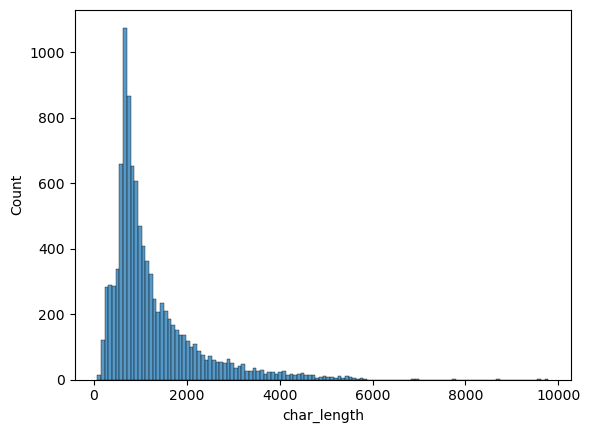

In [58]:
# Ye ek pdf hai isko interpet aise krna hai ke. jiske sb se zda probability hai, agr ek random review choice kre too unme se hoga

sns.histplot(imdb_df['char_length'])

In [59]:
# But now the question: is this feature gonna help us to classify
# For that you can do is you do not plot the distplot on the whole dataset but plot 2 distplot one for positive and one for negative.

> If there is big difference between the two class then that feature is useful otherwise not

<Axes: xlabel='char_length', ylabel='Count'>

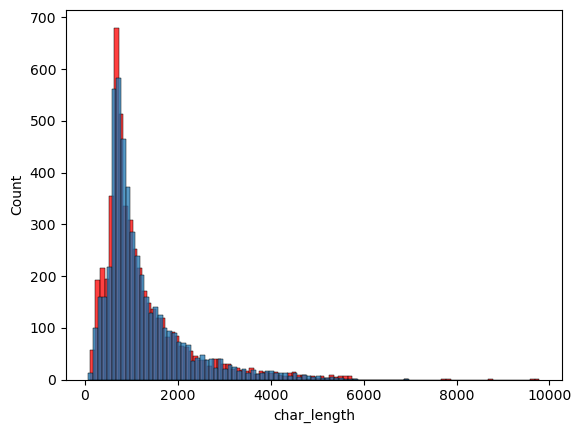

In [60]:
sns.histplot(imdb_df[imdb_df['sentiment'] == 'positive']['char_length'],color='red')
sns.histplot(imdb_df[imdb_df['sentiment'] == 'negative']['char_length'])

>Same distribution, follow kar rhe hai dono so feature zda faide mn nhi hai.
>> Iska mtlb aapne joo feature banna hai woo bhut positively positive and negative ke beech me difference create nhi kr rha hai.


In [61]:
imdb_df.head(3)

,review,sentiment,clean_review2,tokenized_review,stopwords_removed_tokenized_review,processed_review,processed_char_length,char_length,without_stopwords_word_length,word_length
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"['one', 'of', 'the', 'other', 'reviewers', 'ha...","['one', 'reviewers', 'mentioned', 'watching', ...",one reviewers mentioned watching 1 oz episode ...,1213,1684,1832,2847
1,a wonderful little production. the filming tec...,positive,a wonderful little production the filming tech...,"['a', 'wonderful', 'little', 'production', '.'...","['wonderful', 'little', 'production', '.', 'fi...",wonderful little production . filming techniqu...,705,936,1021,1517
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"['i', 'thought', 'this', 'was', 'a', 'wonderfu...","['thought', 'wonderful', 'way', 'spend', 'time...",thought wonderful way spend time hot summer we...,643,882,968,1499


<Axes: xlabel='char_length', ylabel='Density'>

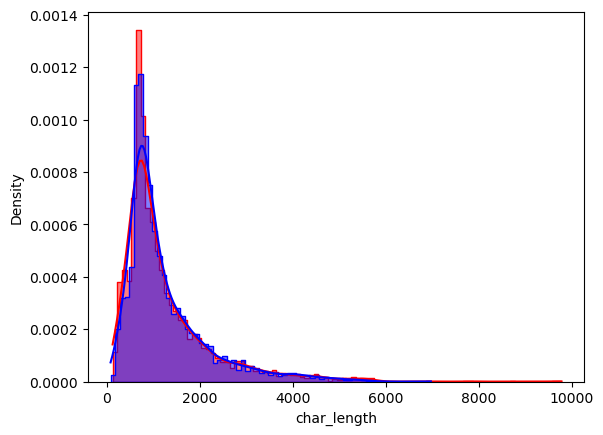

In [62]:
# Positive
sns.histplot(imdb_df[imdb_df['sentiment'] == 'positive']['char_length'],
             kde=True,   # adds the KDE curve like distplot
             color="red",
             stat="density",
             element="step",
             )

# Negative
sns.histplot(imdb_df[imdb_df['sentiment'] == 'negative']['char_length'],
             kde=True,
             color="blue",
             stat="density",
             element="step",
             )


>Add kde='TRUE', and stat='density'
>> For same graph as Nitish sir

<Axes: xlabel='without_stopwords_word_length', ylabel='Count'>

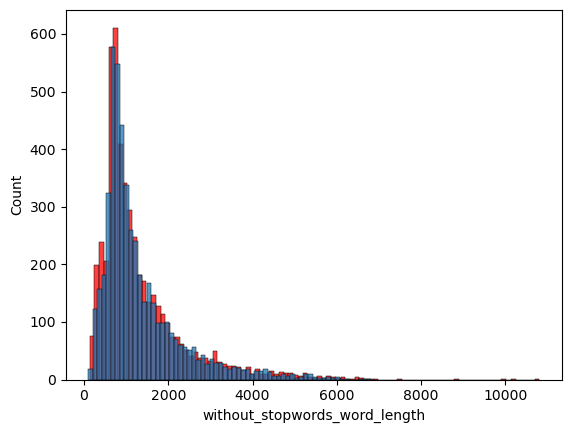

In [63]:
sns.histplot(imdb_df[imdb_df['sentiment'] == 'positive']['without_stopwords_word_length'],color='red')
sns.histplot(imdb_df[imdb_df['sentiment'] == 'negative']['without_stopwords_word_length'])

<Axes: xlabel='word_length', ylabel='Count'>

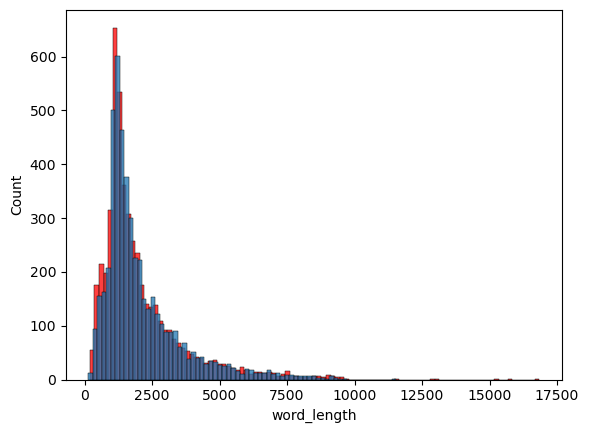

In [64]:
sns.histplot(imdb_df[imdb_df['sentiment'] == 'positive']['word_length'],color='red')
sns.histplot(imdb_df[imdb_df['sentiment'] == 'negative']['word_length'])

>Ab thinks feature extract kaise kr skte aur kon sa kare jisse classification me help mile
>>Also, watch Nitish sir **quora question Pairs NLP project**

<h4><b>iv) Creating unigram, bigram and trigram

<hr><hr>
Perfect 👌 You’ve reached one of the most **powerful concepts in NLP feature engineering**: **n-grams**. Since this is your first NLP project (IMDB dataset), I’ll teach you *everything you need to know*—the theory, math, intuition, pros/cons, coding, and how to apply it to your dataset. Let’s go step by step 🚀.

---

# 🔹 1. What Are N-grams?

* **Definition**: An n-gram is a sequence of *n words* that appear consecutively in a text.

  * **Unigram (n=1):** Single words → `"movie"`, `"good"`, `"bad"`.
  * **Bigram (n=2):** Pairs of consecutive words → `"good movie"`, `"bad acting"`.
  * **Trigram (n=3):** Triplets of consecutive words → `"really good movie"`.
  * **n-gram (general):** Any sequence of *n* consecutive tokens.

👉 Example sentence:
*"The movie was really good."*

* Unigrams: `[The] [movie] [was] [really] [good]`
* Bigrams: `[The movie], [movie was], [was really], [really good]`
* Trigrams: `[The movie was], [movie was really], [was really good]`

---

# 🔹 2. Why Do We Use N-grams?

* **Capture Context**:

  * Unigrams only give word counts, but no word relationship.
  * `"not good"` vs `"good"` → unigram model treats `"not"` and `"good"` separately, missing the *negation*.
  * Bigrams fix this: `"not good"` becomes its own feature.
* **Preserve Local Meaning**: Many sentiments/meanings are expressed through short word combinations.
* **Feature Richness**: Improves model’s ability to classify sentiment/text topics by providing more context.

---

# 🔹 3. Is It Worth Using N-grams?

✅ **Advantages**:

* Captures context, idioms, collocations (e.g., `"New York"`, `"machine learning"`, `"not good"`).
* Improves classification accuracy in many tasks (sentiment analysis, topic modeling).
* Especially helpful in **short texts** (tweets, reviews, etc.).

❌ **Disadvantages**:

* **Feature explosion**: As n increases, the number of possible n-grams grows exponentially.

  * Example: Vocabulary size = 10,000

    * Unigrams = 10,000
    * Bigrams = 100,000,000
    * Trigrams = 1 trillion 🤯
* **Data sparsity**: Rare n-grams may appear only once, adding noise.
* **Computational cost**: Large memory and training time.

⚖️ **Best Practice**:

* Use **unigrams + bigrams** (common for text classification).
* Trigrams and higher often add noise unless you have *very large datasets*.
* Use **feature selection (Chi-square, Mutual Information, TF-IDF)** to filter useful n-grams.

---

# 🔹 4. How to Represent N-grams in Code

There are two popular ways:

### (A) Bag-of-N-grams (Count Vectorization)

* Convert text into a sparse matrix of n-gram counts.

```python
from sklearn.feature_extraction.text import CountVectorizer

# Example with unigrams and bigrams
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')  
X = vectorizer.fit_transform(imdb_df['processed_review'])

print("Shape of matrix:", X.shape)  
print("Sample features:", vectorizer.get_feature_names_out()[:20])
```

👉 `ngram_range=(1,2)` = unigrams + bigrams.
👉 `ngram_range=(2,2)` = only bigrams.
👉 `ngram_range=(1,3)` = unigrams + bigrams + trigrams.

---

### (B) TF-IDF with N-grams

* Better than raw counts since it considers importance of words.

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words='english', max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(imdb_df['processed_review'])

print("Shape of TF-IDF matrix:", X_tfidf.shape)
print("Sample features:", tfidf_vectorizer.get_feature_names_out()[:20])
```

👉 `max_features=10000` keeps top 10k most informative n-grams (to reduce dimensionality).

---

# 🔹 5. Example: Top N-grams in IMDB Dataset

You can explore most frequent n-grams:

```python
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english', max_features=20)
X_bigram = bigram_vectorizer.fit_transform(imdb_df['processed_review'])

# Get top bigrams
bigram_freq = pd.DataFrame(X_bigram.toarray(), columns=bigram_vectorizer.get_feature_names_out())
print(bigram_freq.sum().sort_values(ascending=False))
```

This will show top bigrams like `"not good"`, `"highly recommend"`, `"worth watching"`.

---

# 🔹 6. Visualization of N-grams

You can visualize with **wordclouds**:

```python
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(imdb_df['processed_review'])

# WordCloud for Bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
X_bigrams = bigram_vectorizer.fit_transform(imdb_df['processed_review'])
bigram_freq = dict(zip(bigram_vectorizer.get_feature_names_out(), X_bigrams.sum(axis=0).A1))

wc = WordCloud(width=800, height=400).generate_from_frequencies(bigram_freq)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
```

---

# 🔹 7. When to Use N-grams

* **Sentiment analysis** → Bigram captures `"not good"`, `"very bad"`.
* **Topic classification** → `"machine learning"`, `"climate change"`.
* **Information retrieval** → `"deep learning models"`.

📌 For IMDB dataset (sentiment classification):
👉 **Unigram + Bigram TF-IDF** is usually the best balance.

---

✅ **Summary**:

* **Unigram** = word-level meaning.
* **Bigram** = captures short dependencies, negations, phrases.
* **Trigram+** = only if you have lots of data.
* Best practice = use **TF-IDF with (1,2) n-gram range** for IMDB sentiment analysis.

---


Good question 👍 — so far, we’ve used **scikit-learn’s `CountVectorizer` / `TfidfVectorizer`** to build n-grams automatically.
But if you want **manual control** or want to understand what’s happening under the hood, you can use **NLTK** to generate n-grams directly. Let’s go step by step 🚀

---

# 🔹 1. N-gram Functions in NLTK

NLTK provides a simple function:

```python
from nltk.util import ngrams

tokens = ["the", "movie", "was", "really", "good"]
bigrams = list(ngrams(tokens, 2))   # bigram
trigrams = list(ngrams(tokens, 3))  # trigram

print("Bigrams:", bigrams)
print("Trigrams:", trigrams)
```

👉 Output:

```
Bigrams: [('the', 'movie'), ('movie', 'was'), ('was', 'really'), ('really', 'good')]
Trigrams: [('the', 'movie', 'was'), ('movie', 'was', 'really'), ('was', 'really', 'good')]
```

So, `ngrams(tokens, n)` gives you tuples of n consecutive tokens.

---

# 🔹 2. Generating N-grams from IMDB Dataset

Suppose your dataset is already **tokenized** into `processed_review` (a list of words).
You can do:

```python
import nltk
from nltk.util import ngrams

# Example with one review
review = "the movie was not good".split()

# Unigram, Bigram, Trigram
unigrams = list(ngrams(review, 1))
bigrams = list(ngrams(review, 2))
trigrams = list(ngrams(review, 3))

print("Unigrams:", unigrams)
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)
```

---

# 🔹 3. Applying to Entire IMDB Dataset

If you want to add new columns (`unigrams`, `bigrams`, etc.) in your DataFrame:

```python
def generate_ngrams(tokens, n):
    return ["_".join(gram) for gram in ngrams(tokens, n)]

# Assuming imdb_df['tokenized_review'] already exists
imdb_df['unigrams'] = imdb_df['tokenized_review'].apply(lambda x: generate_ngrams(x, 1))
imdb_df['bigrams']  = imdb_df['tokenized_review'].apply(lambda x: generate_ngrams(x, 2))
imdb_df['trigrams'] = imdb_df['tokenized_review'].apply(lambda x: generate_ngrams(x, 3))
```

👉 Example output row:

```
Review: "the movie was not good"
Unigrams: ['the', 'movie', 'was', 'not', 'good']
Bigrams: ['the_movie', 'movie_was', 'was_not', 'not_good']
Trigrams: ['the_movie_was', 'movie_was_not', 'was_not_good']
```

---

# 🔹 4. Frequency Distribution of N-grams

To find the most common n-grams in the entire dataset:

```python
from nltk import FreqDist
from itertools import chain

# Flatten list of bigrams across all reviews
all_bigrams = list(chain.from_iterable(imdb_df['bigrams']))

# Frequency distribution
bigram_freq = FreqDist(all_bigrams)

print("Most common bigrams:", bigram_freq.most_common(10))
```

---

# 🔹 5. Combining with Machine Learning

👉 NLTK’s n-grams are **lists of tuples**, not directly usable in ML models.
So, you usually:

1. Generate n-grams with NLTK.
2. Join them back into strings (like `"not_good"`) → as new features.
3. Feed them into **CountVectorizer / TfidfVectorizer** (like earlier).

This way, you have **full control** over tokenization + n-gram generation, instead of letting sklearn do everything.

---

✅ **Summary**:

* Use `nltk.util.ngrams(tokens, n)` for manual n-grams.
* Store them as lists in your DataFrame.
* Use `FreqDist` for analysis.
* For ML, join them into strings and vectorize.

---


In [65]:
imdb_df.head(3)

,review,sentiment,clean_review2,tokenized_review,stopwords_removed_tokenized_review,processed_review,processed_char_length,char_length,without_stopwords_word_length,word_length
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"['one', 'of', 'the', 'other', 'reviewers', 'ha...","['one', 'reviewers', 'mentioned', 'watching', ...",one reviewers mentioned watching 1 oz episode ...,1213,1684,1832,2847
1,a wonderful little production. the filming tec...,positive,a wonderful little production the filming tech...,"['a', 'wonderful', 'little', 'production', '.'...","['wonderful', 'little', 'production', '.', 'fi...",wonderful little production . filming techniqu...,705,936,1021,1517
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"['i', 'thought', 'this', 'was', 'a', 'wonderfu...","['thought', 'wonderful', 'way', 'spend', 'time...",thought wonderful way spend time hot summer we...,643,882,968,1499


In [66]:
from nltk import ngrams

In [67]:
# example of unigram/bigram and trigram

tokens = ["the", "movie", "was", "really", "good"]
unigrams = list(ngrams(tokens,1))
bigrams = list(ngrams(tokens, 2))   # bigram
trigrams = list(ngrams(tokens, 3))  # trigram

print("Unigrams:", unigrams)
print("Bigrams:", bigrams)
print("Trigrams:", trigrams)

Unigrams: [('the',), ('movie',), ('was',), ('really',), ('good',)]
Bigrams: [('the', 'movie'), ('movie', 'was'), ('was', 'really'), ('really', 'good')]
Trigrams: [('the', 'movie', 'was'), ('movie', 'was', 'really'), ('was', 'really', 'good')]


In [68]:
list_of_string = df['stopwords_removed_tokenized_review'].sum()



In [69]:
# print(list_of_string)

In [70]:
# pd.Series(ngrams(list_of_string, 1)).value_counts()

In [71]:
# pd.Series(ngrams(list_of_string, 2)).value_counts()

In [72]:
# pd.Series(ngrams(list_of_string, 3)).value_counts()

>>Isme bhi ham ab n-grams me positive aur negative reviews ka top n-grams ala ala print kar skte hai.   

<h2><hr><center><b>"⚠ Bhut bda error aaagya tha, so niche ke notes usse ko explain kar rha hai"

Bhai ab mujhe clearly samajh aa gaya ki issue kahan hai 🔎

Tera output mein `(,)`, `( ,)`, `(e,)`, `(i,)` etc. aa raha hai — iska matlab hai ki **n-gram function words ke bajay characters ya unwanted tokens ko utha raha hai**. Main step by step samjhata hu:

---

### 1. Problem kaha se ho rahi hai?

```python
list_of_string = imdb_df['stopwords_removed_tokenized_review'].sum()
```

* `.sum()` jab **list of lists** pe chalate ho to, Python lists ke case me ye **concatenate** karta hai (achha hai).
* Lekin agar column ke andar **string (jaise `'[one, two]'`)** type values aa gayi to `.sum()` unhe bhi concatenate karke ek badi **string** bana dega.
* Result: tumhara `list_of_string` ek **list of tokens** nahi raha, balki ek **string ke characters** ban gaye.

Phir jab tum ye chala rahe ho:

```python
pd.Series(ngrams(list_of_string, 1)).value_counts()
```

to `ngrams` ko lag raha hai input ek sequence hai → usne har ek character ko ek "token" maan liya. Isliye output mein `','`, `'('`, `')'`, `'e'`, `'i'` alag-alag aa gaye.

---

### 2. Kaise debug kar sakte ho

Tum simple check karke confirm kar sakte ho:

```python
type(list_of_string)          # list hai ya string?
print(list_of_string[:50])    # pehle 50 elements print karke dekho
```

Agar ye characters dikhata hai (e.g. `'[', 'o', 'n', 'e', ',' ...`) → to samajh lo string bana diya hai.
Agar words dikhte hain (e.g. `'one', 'reviewers', 'mentioned', ...`) → tabhi sahi hai.

---

### 3. Correct karne ka tarika ✅

Tumhe ensure karna hoga ki `stopwords_removed_tokenized_review` column ke andar **list of tokens** hi ho, string nahi. Matlab:

* Agar column me values string ke form me list jaisi hain (`"['one','two']"`), to pehle unko Python list me convert karo:

  ```python
  import ast
  imdb_df['stopwords_removed_tokenized_review'] = imdb_df['stopwords_removed_tokenized_review'].apply(ast.literal_eval)
  ```

* Ab ye har row me **list of words** ban jayega.

* Fir n-gram banane ke liye:

  ```python
  from nltk import ngrams

  list_of_string = sum(imdb_df['stopwords_removed_tokenized_review'], [])  # list of lists flatten
  unigrams = pd.Series(ngrams(list_of_string, 1)).value_counts()
  bigrams = pd.Series(ngrams(list_of_string, 2)).value_counts()
  trigrams = pd.Series(ngrams(list_of_string, 3)).value_counts()
  ```

Ab output me `(word1,)`, `(word1, word2)`, `(word1, word2, word3)` aayenge — punctuation/letters nahi.

---

### 4. Tumhare case me galti ka root cause

* `stopwords_removed_tokenized_review` column me lists **string ke form me store** hain (quotes aur brackets ke saath).
* Tumne directly `.sum()` kar diya → isne ek **badi string** bana di.
* NLTK `ngrams` ne har ek character ko ek token maan liya.

Isliye unwanted `(,)`, `( ,)` aa rahe hain.

---

👉 Solution: pehle `ast.literal_eval` ya `json.loads` use karke column ke andar ki lists ko proper Python lists me convert karo. Phir flatten karke n-gram nikaalo.

---

Haan, bilkul dikha sakta hu example ke saath + thoda simple tarike se samjhaunga ki yeh ho kyun raha hai.

---

## Example se samjho

### Situation:

Maan lo tumne CSV ya kisi file se `imdb_df` load kiya. Aur usme column `stopwords_removed_tokenized_review` aise dikh raha hai:

```
"['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', ... ]"
"['wonderful', 'little', 'production', '.', 'the', 'filming', ... ]"
...
```

Notice kar: har entry me **brackets \[ ] aur quotes ' ' ke andar words** hain. Matlab entry ka pura content *ek string* hai jo dikhne mein list jaisa hai.

### Why string ho jaata hai:

* Jab tum DataFrame ko CSV se load karte ho using `pd.read_csv(...)`, CSV format text-based hota hai.
* Agar tumne DataFrame ko pehle file me likha tha jisme list objects the, to jab DataFrame `to_csv()` hogaya, Python converts those lists to their **string representation** — i.e. `"['one', 'two', 'three']"` as a string.
* Jab CSV se wapas `pd.read_csv` karte ho, woh string representation laata hai, **list object nahi**.

So effectively tumhare column ka data type ban jaata hai `str` (string) containing list-like text, not real `list`.

---

## Chhota example

```python
import pandas as pd

# suppose tumhara CSV ya data kuch aise:
df = pd.DataFrame({
    'stopwords_removed_tokenized_review': [
        "['hello', 'world', 'this', 'is']",
        "['another', 'review', 'here']"
    ]
})

# Check type
print(type(df['stopwords_removed_tokenized_review'].iloc[0]))
# Output: <class 'str'>

# Agar tum flatten karoge ya sum() use karoge, yeh string treat hoga,
# toh list of characters ban jaayegi

s = df['stopwords_removed_tokenized_review'].sum()
print(type(s))
print(s[:30])  # pehle 30 characters dekh lo
# Something like:
#    "['hello', 'world', 'this', 'is"]["another', 'review',"
```

Yahan `s` ek bada string hai, jisme `"['hello', 'world'..." + "['another', 'review'..."` concat ho gaya.

Fir agar `ngrams(s,1)` karega, to `s` character by character traverse karega: har character ko token maan lega. Isliye output me `('h',)`, `('e',)`, `('l',)`, `(',',)`, `('[',)`, `(']',)` etc aayenge.

---

## Kaise sahi list banaye (string ko list me convert karna)

```python
import pandas as pd
import ast

# Example df
df = pd.DataFrame({
    'stopwords_removed_tokenized_review': [
        "['hello', 'world', 'this', 'is']",
        "['another', 'review', 'here']"
    ]
})

# Convert string representation of list into real list
df['stopwords_removed_tokenized_review'] = df['stopwords_removed_tokenized_review'].apply(ast.literal_eval)

# Ab check type
print(type(df['stopwords_removed_tokenized_review'].iloc[0]))
# Output: <class 'list'>

# Ab flatten kar sakte ho
all_tokens = sum(df['stopwords_removed_tokenized_review'], [])
print(all_tokens)
# ['hello', 'world', 'this', 'is', 'another', 'review', 'here']

# Fir ngrams
from nltk import ngrams
import pandas as pd

uni = pd.Series(ngrams(all_tokens, 1)).value_counts()
print(uni.head())
```

---

## Summary

| Cheez                       | String form                       | Real list form                |
| --------------------------- | --------------------------------- | ----------------------------- |
| Type of each cell in column | `str` (text)                      | `list` (Python list)          |
| `.sum()` behaviour          | concatenates strings → big string | concatenates lists → big list |
| `ngrams(...,1)` result      | characters (and punctuation etc)  | words or tokens as desired    |

---

Great question, Ali 👍 Let’s break this down step by step.

---

### 1. What’s happening in your code

```python
import ast
imdb_df['stopwords_removed_tokenized_review'] = imdb_df['stopwords_removed_tokenized_review'].apply(ast.literal_eval)
```

* `imdb_df['stopwords_removed_tokenized_review']` → This column currently contains **strings**.
  For example, it might look like this:

  ```python
  "['this', 'movie', 'amazing']"
  ```

  Notice: this is a **string representation** of a Python list, not an actual list.

* `.apply(ast.literal_eval)` → Here, for each row, you’re applying the function `ast.literal_eval` to the string.
  This **converts the string into the actual Python object it represents**.

  So:

  ```python
  "['this', 'movie', 'amazing']"   --->   ['this', 'movie', 'amazing']
  ```

  After applying, the column values become proper Python lists of tokens.

---

### 2. What does `ast.literal_eval` do?

* `ast` = **Abstract Syntax Trees** (a Python standard library module).
* `ast.literal_eval` is a **safe evaluator** that takes a string containing a Python literal (like a list, dict, tuple, int, float, string, etc.) and converts it into the corresponding Python object.

✅ Examples:

```python
import ast

ast.literal_eval("[1, 2, 3]")       # → [1, 2, 3]   (list)
ast.literal_eval("{'a': 10, 'b': 20}")  # → {'a': 10, 'b': 20} (dict)
ast.literal_eval("('x', 'y')")      # → ('x', 'y')  (tuple)
```

🚨 Unlike `eval()`, which executes arbitrary Python code and is unsafe,
`literal_eval` only works on literals (lists, dicts, strings, numbers, etc.). This makes it much safer.

---

### 3. Why is this useful here?

Because your `stopwords_removed_tokenized_review` column is full of **strings that look like lists**.

* Machine learning and NLP models usually expect lists/tokens, not strings.
* By applying `ast.literal_eval`, you transform the column into actual **Python lists**, making it ready for further processing (like embedding, vectorization, etc.).

---

👉 Quick tip: If you only need to store and reload lists safely, an alternative is to use **JSON** instead of stringifying Python lists. For example:

```python
import json

# Convert to JSON string
json.dumps(['this', 'movie', 'amazing'])   # → '["this", "movie", "amazing"]'

# Convert back to list
json.loads('["this", "movie", "amazing"]') # → ['this', 'movie', 'amazing']
```

JSON is more portable than Python literal strings.

---

In [73]:
# import ast
# imdb_df['stopwords_removed_tokenized_review'] = imdb_df['stopwords_removed_tokenized_review'].apply(ast.literal_eval)


In [74]:
# correct_list_of_string = sum(imdb_df['stopwords_removed_tokenized_review'], [])

In [75]:
unigrams = pd.Series(ngrams(list_of_string, 1)).value_counts()
bigrams = pd.Series(ngrams(list_of_string, 2)).value_counts()
trigrams = pd.Series(ngrams(list_of_string, 3)).value_counts()

In [76]:
print(unigrams)

(,,)                  108268
(.,)                   92167
(movie,)               17140
(film,)                15040
(),)                   14074
                       ...  
(ambitiousness,)           1
(agatha-phile,)            1
(opportunities.i,)         1
(hollywood-isms,)          1
(renumber,)                1
Name: count, Length: 77614, dtype: int64


In [78]:
print(bigrams)

(), ,)                  2516
(movie, .)              2382
(), .)                  2326
(!, !)                  2081
(film, .)               1963
                        ... 
(sequencing, events)       1
(events, awful)            1
(setup, .)                 1
(coming, terrible)         1
(hurt, yet)                1
Name: count, Length: 775456, dtype: int64


#### **6. Generating Wordcloud**

**Positive Reviews Wordcloud**

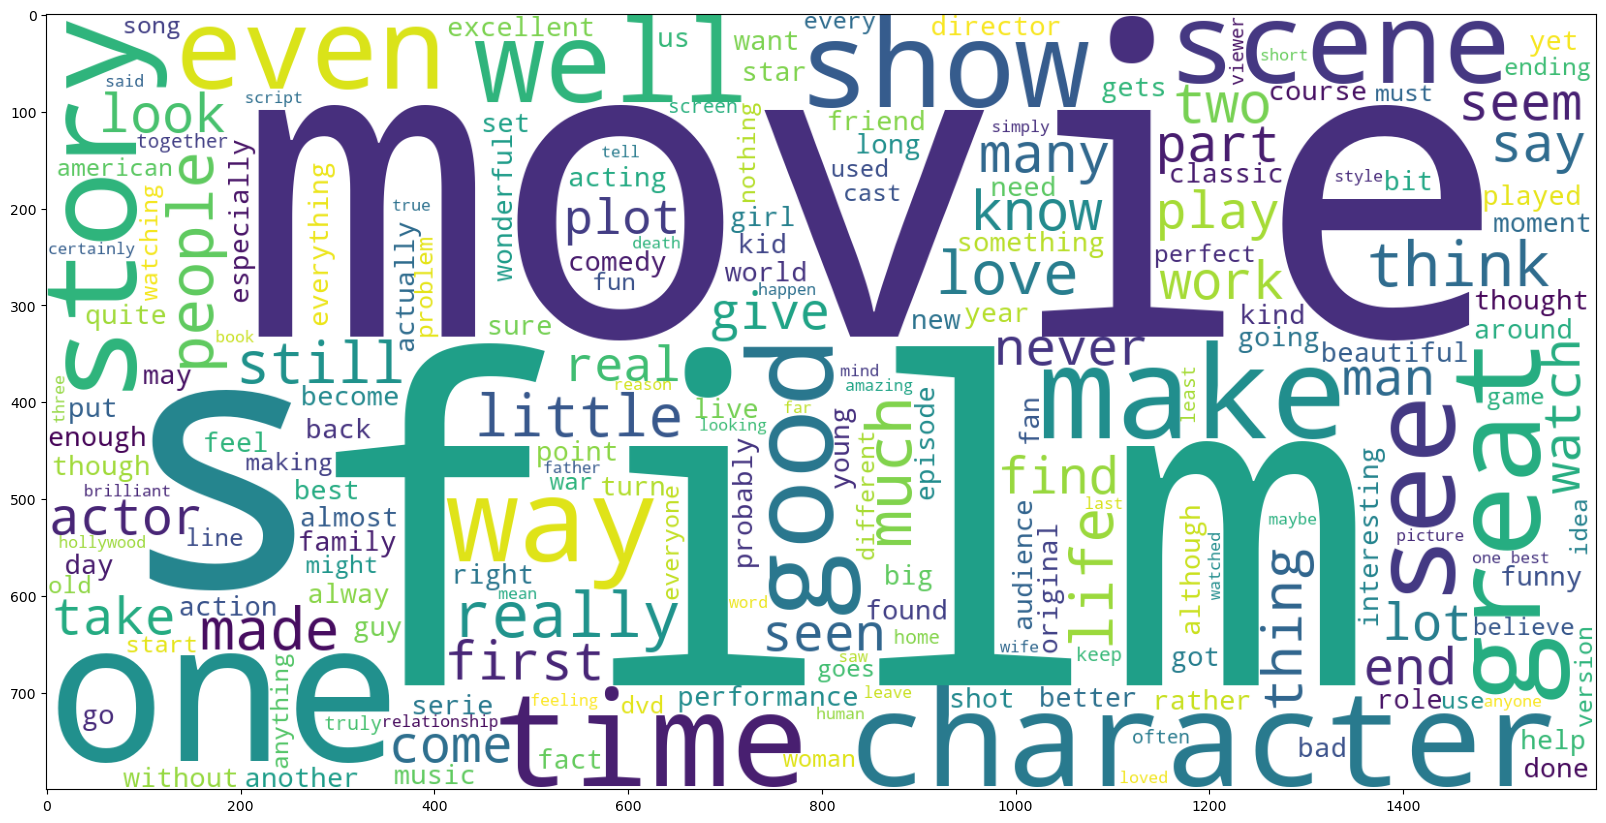

In [95]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure(figsize = (20,20)) # Positive Review Text

wc = WordCloud(width = 1600 , height = 800, background_color = 'white').generate(" ".join(df[df['sentiment'] == 'positive']['processed_review']))

plt.imshow(wc)

 **Negative Reviews Wordcloud**

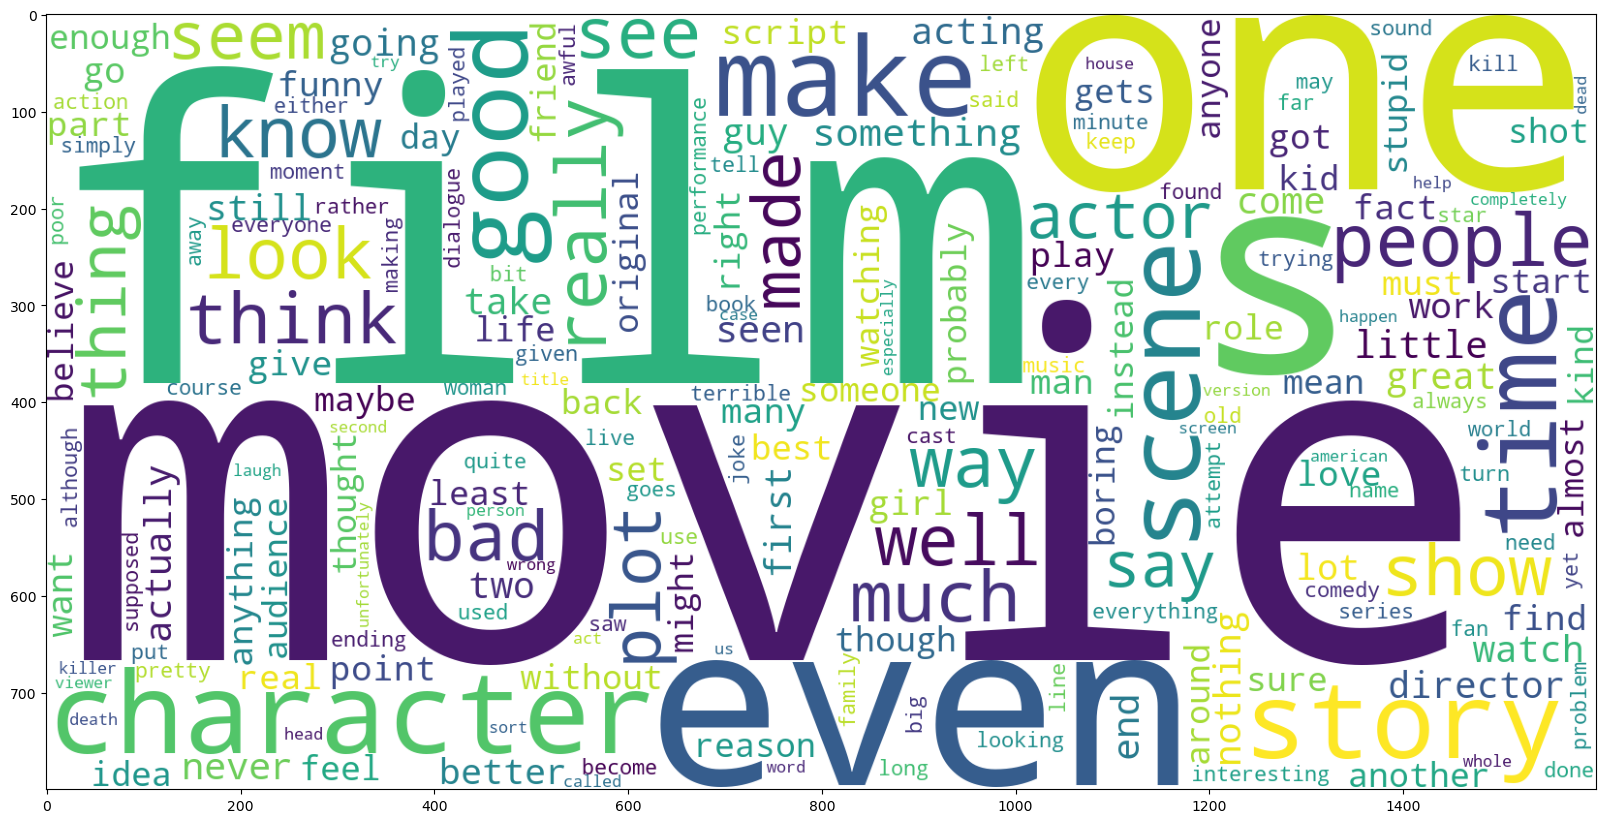

In [97]:
plt.figure(figsize = (20,20)) # Positive Review Text
wc = WordCloud(width = 1600 , height = 800, background_color = 'white').generate(" ".join(df[df['sentiment'] == 'negative']['processed_review']))

plt.imshow(wc)


<center><h2><b>4. Vectorization

<h3><b>i) Bag Of Words

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000,ngram_range=(1,3))
bag_of_words = count_vectorizer.fit_transform(df['review'])

bag_of_words = pd.DataFrame(bag_of_words.toarray(),columns = count_vectorizer.get_feature_names_out())

In [104]:
bag_of_words.shape

(10000, 5000)

In [100]:
bag_of_words

,000,10,10 10,100,11,12,13,15,20,30,...,young man,younger,your,your life,your time,yourself,youth,zero,zombie,zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<center><b><h2>5. Additional

<b><h3>i) PCA

In [109]:
from sklearn.decomposition import PCA

pca = PCA( n_components =  2)

pca_result = pca.fit_transform( X = bag_of_words.values)

In [110]:
pca_result.shape

(10000, 2)

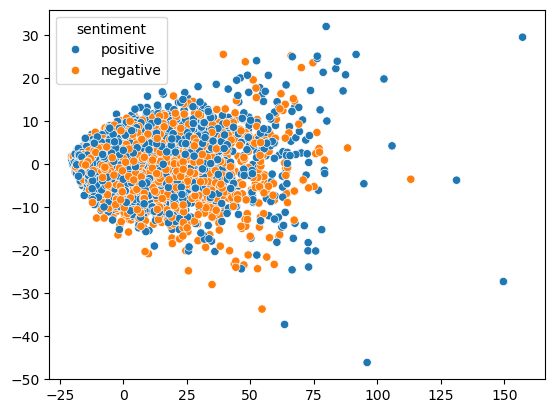

In [113]:
sns.scatterplot(
    x = pca_result[:,0],
    y = pca_result[:,1],
    hue = imdb_df['sentiment']
)

plt.show()


><b>The Next thing do is try Time series and NLP techniques on the whatsapps dataset on kaggle.